In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('additive_manufacturing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        69 non-null     float64
 1   wall_thickness      69 non-null     float64
 2   infill_density      69 non-null     int64  
 3   infill_pattern      69 non-null     object 
 4   nozzle_temperature  69 non-null     int64  
 5   bed_temperature     69 non-null     int64  
 6   print_speed         69 non-null     int64  
 7   material            69 non-null     object 
 8   fan_speed           69 non-null     int64  
 9   roughness           69 non-null     int64  
 10  tension_strength    69 non-null     int64  
 11  elongation          69 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.6+ KB


In [19]:
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include='number').columns.tolist()
print(f'Catergorical Columns: {cat_col}')
print('\n')
print(f'Numerical Columns: {num_col}')

Catergorical Columns: ['infill_pattern', 'material']


Numerical Columns: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strength', 'elongation']


In [20]:
df = pd.get_dummies(df, cat_col, drop_first=True)
df.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,infill_pattern_honeycomb,material_pla
0,0.02,8.0,90,220,60,40,0,25,18,1.2,0,0
1,0.02,7.0,90,225,65,40,25,32,16,1.4,1,0
2,0.02,1.0,80,230,70,40,50,40,8,0.8,0,0
3,0.02,4.0,70,240,75,40,75,68,10,0.5,1,0
4,0.02,6.0,90,250,80,40,100,92,5,0.7,0,0


In [21]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_scaled = s_scaler.fit_transform(df[num_col])
df_scaled = pd.DataFrame(df_scaled, columns=num_col)
df_scaled.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation
0,-1.241429,0.856398,1.301444,-0.127128,-1.233429,-0.858219,-1.386319,-1.406262,-0.191720,-0.572142
1,-1.241429,0.513839,1.301444,0.210249,-0.646487,-0.858219,-0.683586,-1.331940,-0.410376,-0.303128
2,-1.241429,-1.541517,0.939057,0.547627,-0.059545,-0.858219,0.019147,-1.247001,-1.284998,-1.110170
3,-1.241429,-0.513839,0.576669,1.222381,0.527397,-0.858219,0.721880,-0.949715,-1.066343,-1.513691
4,-1.241429,0.171280,1.301444,1.897135,1.114339,-0.858219,1.424613,-0.694898,-1.612982,-1.244677


In [22]:
df = df_scaled.merge(df[['infill_pattern_honeycomb', 'material_pla']], how='left', left_index=True, right_index=True)
print(df.info())
print('\n')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   layer_height              69 non-null     float64
 1   wall_thickness            69 non-null     float64
 2   infill_density            69 non-null     float64
 3   nozzle_temperature        69 non-null     float64
 4   bed_temperature           69 non-null     float64
 5   print_speed               69 non-null     float64
 6   fan_speed                 69 non-null     float64
 7   roughness                 69 non-null     float64
 8   tension_strength          69 non-null     float64
 9   elongation                69 non-null     float64
 10  infill_pattern_honeycomb  69 non-null     uint8  
 11  material_pla              69 non-null     uint8  
dtypes: float64(10), uint8(2)
memory usage: 5.7 KB
None


   layer_height  wall_thickness  infill_density  nozzle_temperature  

In [23]:
X = df.drop('material_pla', axis=1)
y = df['material_pla']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21, stratify = y)

<AxesSubplot:xlabel='Features'>

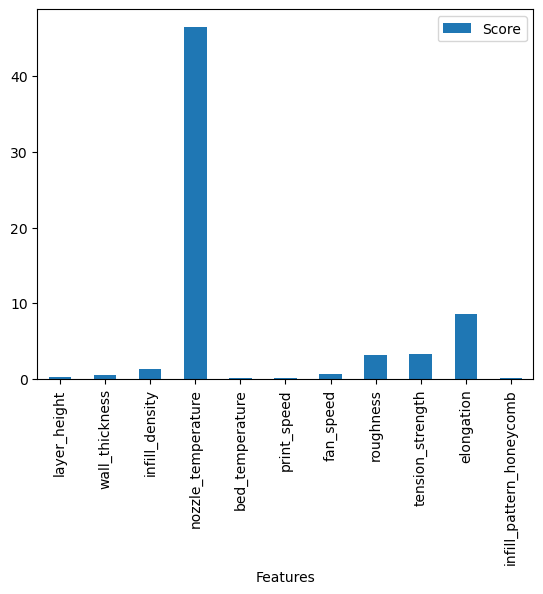

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

skb = SelectKBest(score_func = f_classif,k='all')
fit = skb.fit(X_train, y_train)
scores = pd.DataFrame({'Features':X_train.columns,'Score':fit.scores_})
scores = scores.set_index('Features',drop=True)
scores.plot(kind='bar')

In [26]:
scores.sort_values(by='Score', ascending=False)

,Score
Features,
nozzle_temperature,46.477728
elongation,8.636654
tension_strength,3.246245
roughness,3.128371
infill_density,1.339045
fan_speed,0.598942
wall_thickness,0.459957
layer_height,0.303921
infill_pattern_honeycomb,0.190470


In [27]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [28]:
logreg = LogisticRegression()
sgd = SGDClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rfm = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
xgb = XGBClassifier()
nb = GaussianNB()

classifier_models = [[logreg,'Logistic Regression'],
                     [sgd,'Stochastic Gradient Descent'],
                     [dtc,'Decision Tree'],[svc,'Support Vector Machine'],
                     [rfm,'Random Forest Classifier'],
                     [knn,'K Nearest Neighbors'],
                     [xgb, 'XGBoost Classifier'],
                     [nb,'Naive Bayes']
         ]

In [33]:
classifier_models[0]

[LogisticRegression(), 'Logistic Regression']

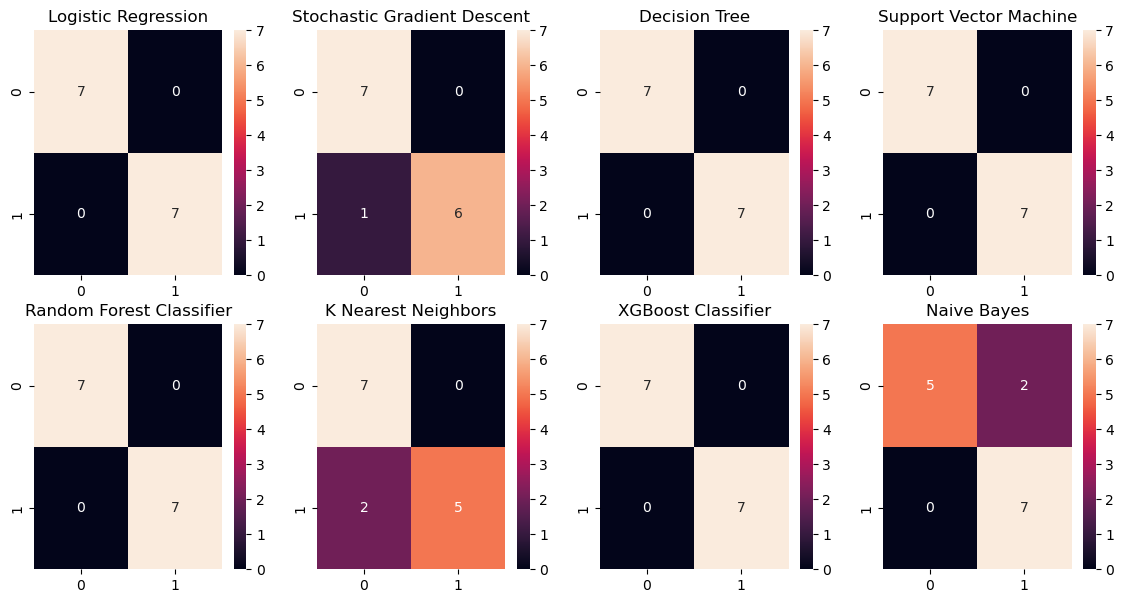

In [34]:
def classifier_model(model_c, ax):
    classifier = model_c
    classifier.fit(X_train, y_train)
    y_pred_classifier = classifier.predict(X_test)
    
    return sns.heatmap(confusion_matrix(y_test, y_pred_classifier), annot=True, ax=ax)

plt.figure(figsize=(14,7))


k=1
for i, j in classifier_models:
    
    ax = plt.subplot(2, 4, k)
    classifier_model(i, ax)
    k+=1
    plt.title(j)

In [40]:
for i, j in classifier_models:
    m = i
    i.fit(X_train, y_train)
    y_pred_classifier = i.predict(X_test)
    print(f'Classification Report of the model {j}: \n {classification_report(y_test, y_pred_classifier)}')

Classification Report of the model Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Classification Report of the model Stochastic Gradient Descent: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Classification Report of the model Decision Tree: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    ac

In [45]:
df.to_pickle('file_name.pkl')